<h1>Loading Dataset from Vehicle.csv<h1>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
vehicle = pd.read_csv('C:/Users/pcs/Documents/GitHub/PRESC/datasets/vehicles.csv')

In [128]:
vehicle.head(5)

COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
0           95           48                    83           178   
1           91           41                    84           141   
2          104           50                   106           209   
3           93           41                    82           159   
4           85           44                    70           205   

   PR.AXIS_ASPECT_RATIO  MAX.LENGTH_ASPECT_RATIO  SCATTER_RATIO  \
0                    72                       10            162   
1                    57                        9            149   
2                    66                       10            207   
3                    63                        9            144   
4                   103                       52            149   

   ELONGATEDNESS  PR.AXIS_RECTANGULARITY  MAX.LENGTH_RECTANGULARITY  \
0             42                      20                        159   
1             45                      19                        143   
2             32                      23                        158   
3             46                      19                        143   
4             45                      19                        144   

   SCALED_VARIANCE_MAJOR  SCALED_VARIANCE_MINOR  SCALED_RADIUS_OF_GYRATION  \
0                    176                    379                        184   
1                    170                    330                        158   
2                    223                    635                        220   
3                    160                    309                        127   
4                    241                    325                        188   

   SKEWNESS_ABOUT_MAJOR  SKEWNESS_ABOUT_MINOR  KURTOSIS_ABOUT_MAJOR  \
0                    70                     6                    16   
1                    72                     9                    14   
2                    73                    14                     9   
3                    63                     6                    10   
4                   127                     9                    11   

   KURTOSIS_ABOUT_MINOR  HOLLOWS_RATIO Class  
0                   187            197   van  
1                   189            199   van  
2                   188            196  saab  
3                   199            207   van  
4                   180            183   bus

<b> All Feature Names contain in vehicles.csv </b>

In [129]:
vehicle.keys()

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO', 'Class'],
      dtype='object')

<b>Target Class for Model</b>

In [130]:
vehicle['Class']

0       van
1       van
2      saab
3       van
4       bus
       ... 
841    saab
842     van
843    saab
844    saab
845     van
Name: Class, Length: 846, dtype: object

In [131]:
vehicle.shape

(846, 19)

<b>The vehicle data contains 19 Features with 846 Records</b>

<h1>  Data Visualization   </h1>

<b>Histogram for analyzing the frequency of labled class</b>

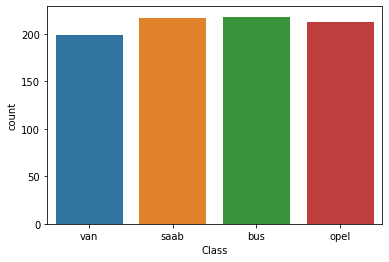

In [132]:
sns.countplot(vehicle['Class'])

<b> Correlation analysis </b>

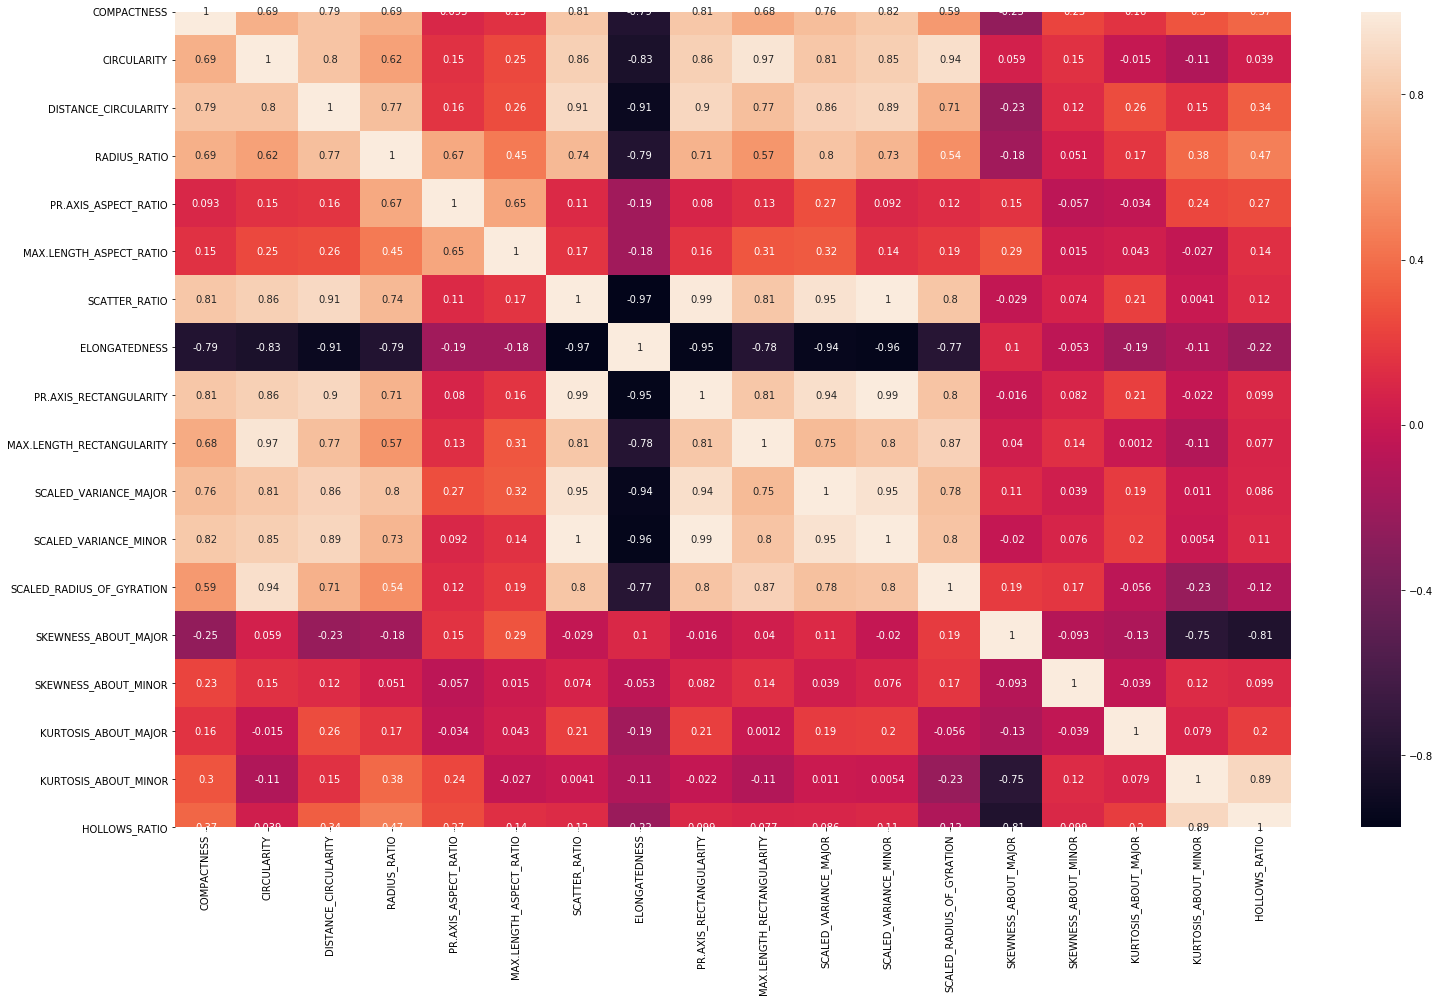

In [133]:
plt.figure(figsize = (25,15))
sns.heatmap(vehicle.corr(), annot = True)

<h1>  Training Model   </h1>

In [134]:
from sklearn.model_selection import train_test_split

<b>Seperating training data from Target Label</b>

In [135]:
X = vehicle.drop(['Class'] , axis = 1)
X

COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
0             95           48                    83           178   
1             91           41                    84           141   
2            104           50                   106           209   
3             93           41                    82           159   
4             85           44                    70           205   
..           ...          ...                   ...           ...   
841           93           39                    87           183   
842           89           46                    84           163   
843          106           54                   101           222   
844           86           36                    78           146   
845           85           36                    66           123   

     PR.AXIS_ASPECT_RATIO  MAX.LENGTH_ASPECT_RATIO  SCATTER_RATIO  \
0                      72                       10            162   
1                      57                        9            149   
2                      66                       10            207   
3                      63                        9            144   
4                     103                       52            149   
..                    ...                      ...            ...   
841                    64                        8            169   
842                    66                       11            159   
843                    67                       12            222   
844                    58                        7            135   
845                    55                        5            120   

     ELONGATEDNESS  PR.AXIS_RECTANGULARITY  MAX.LENGTH_RECTANGULARITY  \
0               42                      20                        159   
1               45                      19                        143   
2               32                      23                        158   
3               46                      19                        143   
4               45                      19                        144   
..             ...                     ...                        ...   
841             40                      20                        134   
842             43                      20                        159   
843             30                      25                        173   
844             50                      18                        124   
845             56                      17                        128   

     SCALED_VARIANCE_MAJOR  SCALED_VARIANCE_MINOR  SCALED_RADIUS_OF_GYRATION  \
0                      176                    379                        184   
1                      170                    330                        158   
2                      223                    635                        220   
3                      160                    309                        127   
4                      241                    325                        188   
..                     ...                    ...                        ...   
841                    200                    422                        149   
842                    173                    368                        176   
843                    228                    721                        200   
844                    155                    270                        148   
845                    140                    212                        131   

     SKEWNESS_ABOUT_MAJOR  SKEWNESS_ABOUT_MINOR  KURTOSIS_ABOUT_MAJOR  \
0                      70                     6                    16   
1                      72                     9                    14   
2                      73                    14                     9   
3                      63                     6                    10   
4                     127                     9                    11   
..                    ...                   ...                   ...  

In [136]:
y  = vehicle['Class']
y

0       van
1       van
2      saab
3       van
4       bus
       ... 
841    saab
842     van
843    saab
844    saab
845     van
Name: Class, Length: 846, dtype: object

<b>Splitting data for training and testing.</b>

In [165]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 , random_state=45)

<b>Training model using Logistic Regression</b>

In [166]:
from sklearn.linear_model import LogisticRegression

LRclassifier = LogisticRegression(solver='lbfgs', multi_class='auto' , max_iter=7600)
LRclassifier.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h1> Evaluating The Model</h1>

In [167]:
from sklearn.metrics import classification_report , confusion_matrix

<b>Values prediccted by Classifier</b>

In [168]:
y_predictLR = LRclassifier.predict(X_test)
y_predictLR

array(['bus', 'saab', 'opel', 'opel', 'saab', 'van', 'saab', 'saab',
       'saab', 'van', 'opel', 'bus', 'opel', 'opel', 'opel', 'van',
       'saab', 'saab', 'bus', 'saab', 'bus', 'bus', 'bus', 'bus', 'bus',
       'van', 'saab', 'saab', 'bus', 'bus', 'saab', 'opel', 'bus', 'saab',
       'van', 'bus', 'saab', 'saab', 'bus', 'van', 'van', 'opel', 'saab',
       'bus', 'saab', 'van', 'bus', 'saab', 'opel', 'bus', 'bus', 'opel',
       'saab', 'van', 'van', 'saab', 'bus', 'bus', 'saab', 'opel', 'van',
       'van', 'bus', 'bus', 'saab', 'van', 'bus', 'bus', 'van', 'van',
       'van', 'opel', 'opel', 'van', 'opel', 'van', 'opel', 'opel', 'bus',
       'bus', 'saab', 'saab', 'opel', 'van', 'bus', 'bus', 'opel', 'saab',
       'opel', 'van', 'saab', 'van', 'van', 'opel', 'opel', 'saab', 'bus',
       'saab', 'saab', 'opel', 'bus', 'saab', 'opel', 'bus', 'van', 'bus',
       'opel', 'saab', 'van', 'opel', 'van', 'bus', 'opel', 'bus', 'opel',
       'opel', 'saab', 'van', 'opel', 'opel', '

<b>Confusion Matrix</b>

In [169]:
cmatrix = confusion_matrix(y_test,y_predict)

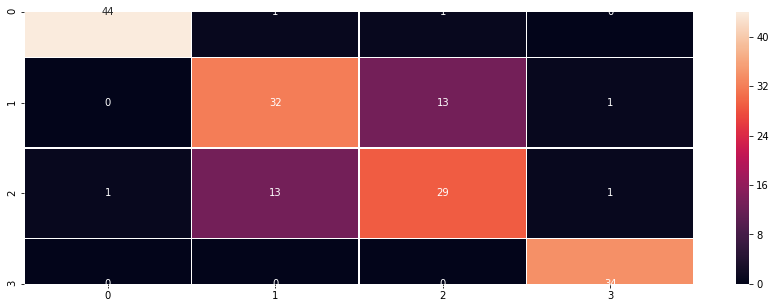

In [170]:
plt.figure(figsize = (15,5))
sns.heatmap(cmatrix, annot=True, linewidths=.5)

In [171]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         bus       0.98      0.96      0.97        46
        opel       0.70      0.70      0.70        46
        saab       0.67      0.66      0.67        44
         van       0.94      1.00      0.97        34

    accuracy                           0.82       170
   macro avg       0.82      0.83      0.83       170
weighted avg       0.82      0.82      0.82       170



<b>Accuracy of model to predict data is : 82%</b>